In [1]:
import geopandas as gpd
import tempun
import matplotlib.pyplot as plt

import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
plt.style.use('seaborn-white')
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")

In [3]:
pleiades_regions = gpd.read_file("../data/pleiades_regions.geojson", driver="GeoJSON")
pleiades_regions_merged = pleiades_regions.unary_union

In [13]:
GIST = gpd.read_parquet("../data/large_data/GIST_v0-1.parquet")
LIST = gpd.read_parquet("../../LIRE_ETL/data/large_data/LIST_v0.1.parquet")

In [25]:
mask = ((GIST["not_after"].notnull()) | (GIST["not_before"].notnull()) & (GIST["x_long"].notnull()))
GIST = GIST[mask].copy()

In [26]:
print(len(GIST))
print(len(LIST))

130487
157800


In [27]:
GIST["random_dates"] = GIST.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=10, antepost=True),axis=1)

In [14]:
LIST["random_dates"] = LIST.apply(lambda row: tempun.model_date(row["not_before"], row["not_after"], size=10, antepost=True),axis=1)

In [28]:
GIST["random_date"] = GIST["random_dates"].apply(lambda x: x[0])
LIST["random_date"] = LIST["random_dates"].apply(lambda x: x[0])

<AxesSubplot:>

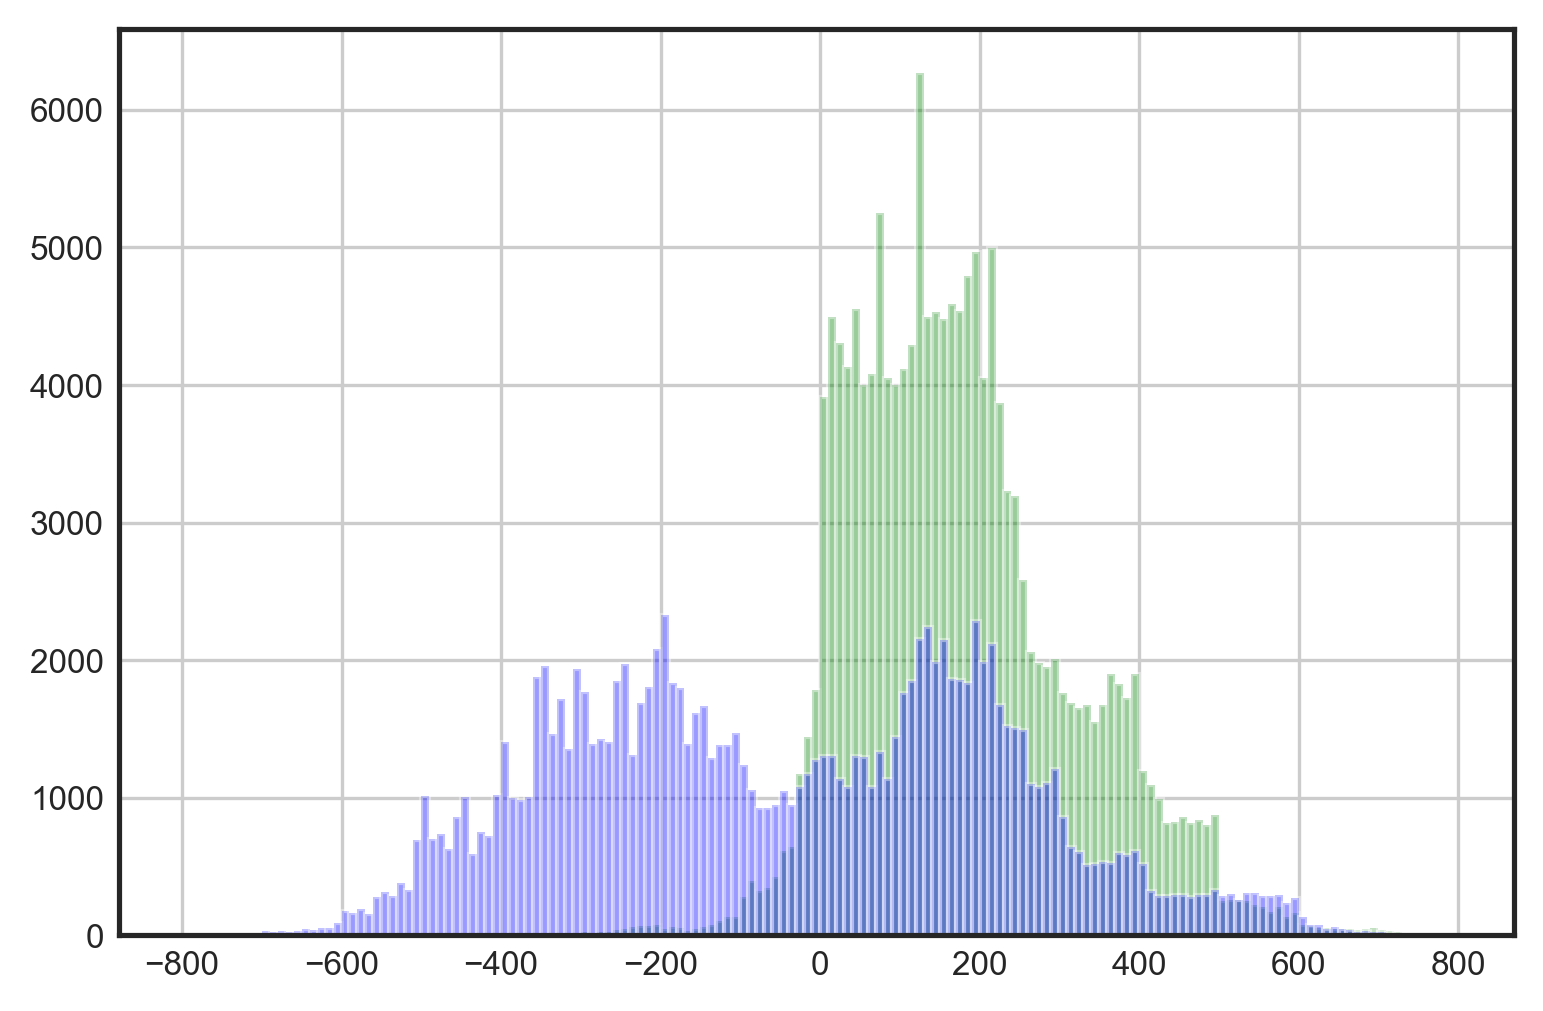

In [31]:
fig, ax = plt.subplots()
LIST["random_date"].hist(bins=range(-800,800,10), color="green", alpha=0.4)
GIST["random_date"].hist(bins=range(-800,800,10), color="blue", alpha=0.4)

In [40]:
GIST["x_long"].mean()

25.684489079667408

In [42]:
GIST["y_lat"].mean()


38.292400817086396

(-10.0, 45.0)

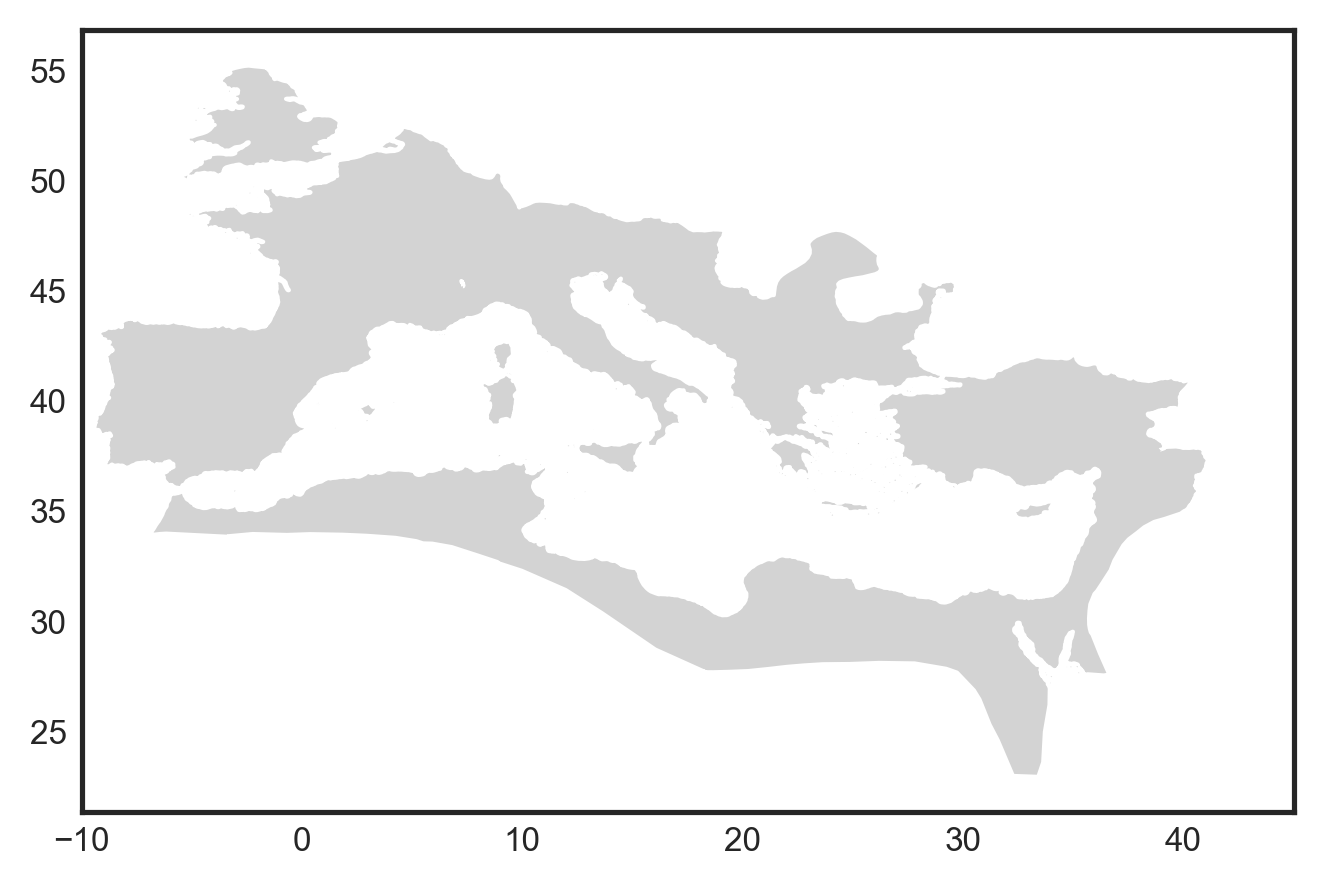

In [50]:
fig, ax = plt.subplots(figsize=(5.2, 3), dpi=300, tight_layout=True)
gpd.GeoSeries(pleiades_regions_merged).plot(ax=ax, color="lightgray")
#GIST.plot()
ax.set_xlim(-10, 45)

MovieWriter ffmpeg unavailable; using Pillow instead.


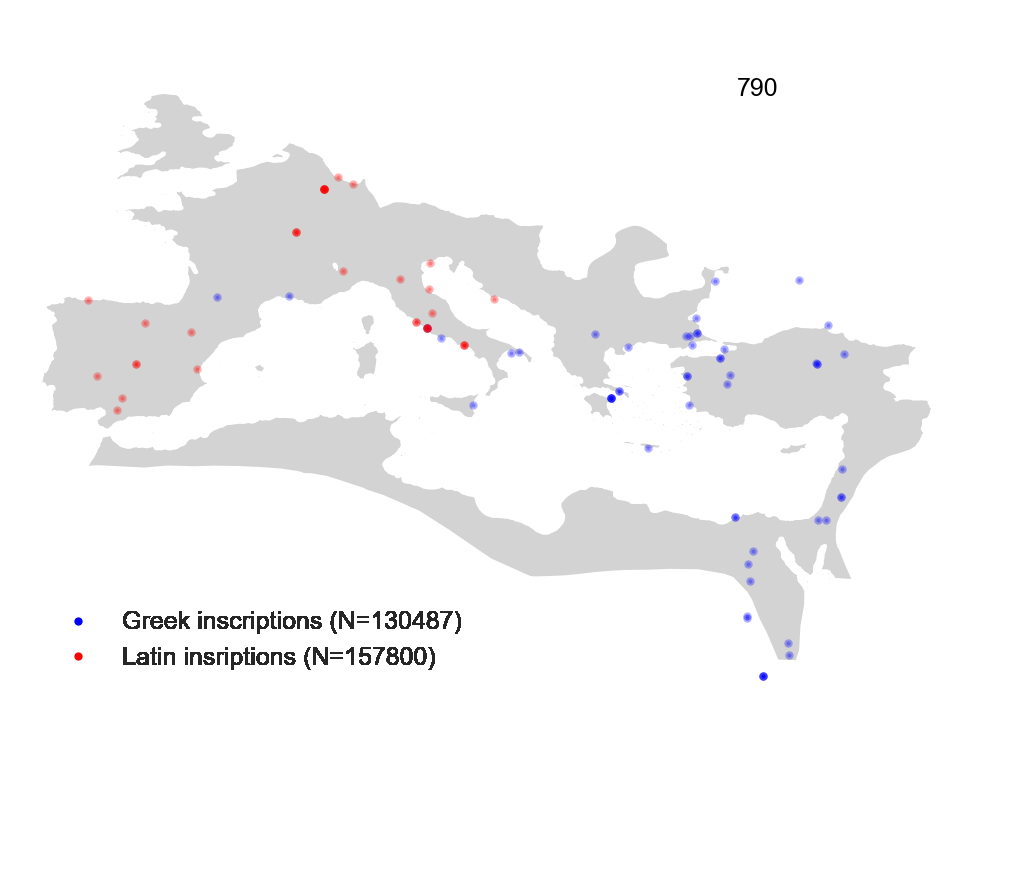

In [67]:
from celluloid import Camera

keep=50

fig = plt.figure(figsize=(5.2, 3), dpi=300, tight_layout=True)
ax = plt.axes()
ax.set_axis_off()
ax.set_xlim(-10,45)

legend_labels = [
    "Greek inscriptions (N={0})".format(str(len(GIST))),
    "Latin insriptions (N={0})".format(str(len(LIST)))
]

colors=["blue", "red"]
markers = [plt.Line2D([0,0],[0,0], color="white", marker='o', markerfacecolor=color, markersize=3) for color in colors]
ax.legend(markers, legend_labels, fontsize=6, numpoints=1,  title="", bbox_to_anchor=(0, 0.2), loc='lower left')

camera = Camera(fig)
for year in range(-800, 800, 10):
    gpd.GeoSeries(pleiades_regions_merged).plot(ax=ax, color="lightgray")
    gist_subset = GIST[(GIST["random_date"]<=year)  & (GIST["random_date"]>year-keep)]
    xs, ys = gist_subset["x_long"].tolist(), gist_subset["y_lat"].tolist()
    ax.scatter(xs, ys, s=1, color="blue", alpha=0.3)
    list_subset = LIST[(LIST["random_date"]<=year) & (LIST["random_date"]>year-keep)]
    xs, ys = list_subset["x_long"].tolist(), list_subset["y_lat"].tolist()
    ax.scatter(xs, ys, s=1, color="red", alpha=0.3)
    ax.text(30,55, str(year), fontsize=6, color="black")
    camera.snap()
animation = camera.animate()
animation.save('../data/epigraphic-habit.gif')